In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Membaca file CS
data = pd.read_csv('tokopedia_sepatu2.csv')


In [3]:
data.shape

(4770, 18)

In [82]:
# data.head(20)

In [4]:
# menghilangkan null
data = data.dropna()

In [5]:
data.shape

(1457, 18)

In [6]:
data.describe()

,id,countReview,discountPercentage,ratingAverage,shop.shopId
count,1.457000e+03,1457.000000,1457.000000,1457.000000,1.457000e+03
mean,7.965786e+09,139.056280,41.274537,4.892450,6.135917e+06
std,4.063797e+09,451.819718,23.247802,0.158194,4.308736e+06
min,1.835526e+08,1.000000,1.000000,3.500000,1.309110e+05
25%,4.107576e+09,5.000000,20.000000,4.900000,2.273695e+06
50%,8.910500e+09,17.000000,46.000000,4.900000,5.841318e+06
75%,1.179744e+10,77.000000,60.000000,5.000000,9.927701e+06
max,1.297877e+10,8503.000000,99.000000,5.000000,1.700725e+07


In [86]:
# data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 4765
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1457 non-null   int64  
 1   name                1457 non-null   object 
 2   badges              1457 non-null   object 
 3   categoryName        1457 non-null   object 
 4   countReview         1457 non-null   int64  
 5   discountPercentage  1457 non-null   int64  
 6   imageUrl            1457 non-null   object 
 7   labelGroups         1457 non-null   object 
 8   originalPrice       1457 non-null   object 
 9   price               1457 non-null   object 
 10  ratingAverage       1457 non-null   float64
 11  url                 1457 non-null   object 
 12  shop.shopId         1457 non-null   int64  
 13  shop.name           1457 non-null   object 
 14  shop.url            1457 non-null   object 
 15  shop.city           1457 non-null   object 
 16  shop.isOffi

In [8]:
data = data.rename(columns={'labelGroups': 'sold'})

In [9]:
# data['sold'].head(len(data))
for i in range(len(data)):
    print(data['sold'].iloc[i])

Diskon 5rb
Cashback 7,9rb
Cashback 11,1rb
Diskon 10rb
Cashback 2,3rb
Diskon 5rb
3rb+ terjual
Cashback 2,4rb
Cashback 8rb
Cashback 2,1rb
Terlaris
Diskon 5rb
Cashback 25,1rb
Cashback 7,1rb
Cashback 4,3rb
Diskon 5rb
Cashback 4,9rb
Diskon 5rb
Cashback 37,6rb
Cashback 43,1rb
Diskon 17,9rb
Diskon 17,9rb
Cashback 2,2rb
Cashback 2,4rb
Cashback 2,2rb
Cashback 19,8rb
Cashback 6,4rb
Cashback 2,4rb
Diskon 12rb
Cashback 5rb
Cashback 44,9rb
Cashback 9,8rb
Cashback 13,1rb
Cashback 13,9rb
Cashback 11,9rb
Cashback 23,3rb
Terlaris
Cashback 15,9rb
3rb+ terjual
Cashback 13,1rb
Diskon 5rb
Cashback 5rb
Diskon 29,9rb
Cashback 17rb
Cashback 52,4rb
Diskon 5rb
Cashback 19,9rb
Cashback 101rb
Cashback 53,1rb
Cashback 16,6rb
Diskon 5rb
Cashback 3,1rb
Cashback 53,9rb
Cashback 1,7rb
Diskon 10rb
Cashback 2,9rb
Cashback 11,1rb
Diskon 5rb
Diskon 10rb
Diskon 5rb
Cashback 30,8rb
Cashback 44,9rb
Cashback 10,8rb
Cashback 2,7rb
Diskon 5rb
Cashback 10,3rb
Diskon 5rb
1rb+ terjual
Cashback 5rb
Diskon 5rb
Diskon 5rb
Cashback 5,

In [10]:
def extract_numeric_value(text):
    # Mencocokkan pola angka menggunakan regular expression
    match = re.search(r'(\d+([,.]\d+)?)(rb)?', text)
    if match:
        # Mengambil nilai yang cocok
        numeric_value = match.group(1)
        # Menghilangkan koma jika ada
        numeric_value = numeric_value.replace(',', '')
        # Mengonversi ke tipe data numerik
        return float(numeric_value)
    else:
        return None

# Menjalankan fungsi extract_numeric_value pada setiap nilai di kolom 'sold' dan menyimpan hasilnya di kolom baru 'sold_numeric'
data['sold'] = data['sold'].apply(extract_numeric_value)

# Menampilkan dataframe dengan kolom 'sold_numeric'
print(data)

               id                                               name  \
0     11718663582  Aerostreet 37-44 Brooklyn Putih Putih Abu Muda...   
1      7320840825                            Sepatu Compass Velocity   
4      7033293128  SEPATU SNEAKERS ORTUSEIGHT 100% ORIGINAL HARVA...   
5      6869226944  HEIDEN HERITAGE [HRTG] - Comet Blaze 365 - Tru...   
11     1062295385  Sepatu PDH Pendek 01 TNI | Sepatu PDH TNI AD S...   
...           ...                                                ...   
4751  12464541908  Sepatu Sandal Anak Laki 6 Bulan 1 2 3 4 5 Tahu...   
4752   4406496907      FILA Sepatu Anak Laki-Laki Strome - All Black   
4755  10032449510  Gabino Sepatu Anak Unisex Slip On Casual Presc...   
4764  11029301660  Sepatu Anak Perempuan Laki Laki Pro ATT Sekola...   
4765  12438817710  Sepatu Pesta Anak Perempuan 21-30 FS222 FAZkid...   

                        badges         categoryName  countReview  \
0               Official Store         Fashion Pria          191   

In [11]:
data

,id,name,badges,categoryName,countReview,discountPercentage,imageUrl,sold,originalPrice,price,ratingAverage,url,shop.shopId,shop.name,shop.url,shop.city,shop.isOfficial,shop.isPowerBadge
0,11718663582,Aerostreet 37-44 Brooklyn Putih Putih Abu Muda...,Official Store,Fashion Pria,191,50,https://images.tokopedia.net/img/cache/200-squ...,5.0,Rp359.800,Rp179.900,4.8,https://www.tokopedia.com/aerostreet/aerostree...,6673471,Aerostreet,https://www.tokopedia.com/aerostreet,Kab. Klaten,True,True
1,7320840825,Sepatu Compass Velocity,Power Merchant Pro Badge,Fashion Pria,95,53,https://images.tokopedia.net/img/cache/200-squ...,79.0,Rp1.699.000,Rp798.000,5.0,https://www.tokopedia.com/tijoepass/sepatu-com...,7098187,Tijoepass,https://www.tokopedia.com/tijoepass,Jakarta Selatan,False,True
4,7033293128,SEPATU SNEAKERS ORTUSEIGHT 100% ORIGINAL HARVA...,Official Store,Fashion Pria,165,15,https://images.tokopedia.net/img/cache/200-squ...,111.0,Rp329.000,Rp279.650,4.9,https://www.tokopedia.com/ranksports/sepatu-sn...,4232765,RANK Sports,https://www.tokopedia.com/ranksports,Serang,True,True
5,6869226944,HEIDEN HERITAGE [HRTG] - Comet Blaze 365 - Tru...,Power Merchant Pro Badge,Fashion Pria,141,16,https://images.tokopedia.net/img/cache/200-squ...,10.0,Rp439.000,Rp369.000,4.9,https://www.tokopedia.com/heidenheritage/heide...,1544074,Heiden Heritage,https://www.tokopedia.com/heidenheritage,Jakarta Utara,False,True
11,1062295385,Sepatu PDH Pendek 01 TNI | Sepatu PDH TNI AD S...,Power Merchant Pro Badge,Fashion Pria,1081,4,https://images.tokopedia.net/img/cache/200-squ...,23.0,Rp120.000,Rp115.000,4.9,https://www.tokopedia.com/industricraftcv/sepa...,7304936,Industri Craft CV,https://www.tokopedia.com/industricraftcv,Jakarta Pusat,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751,12464541908,Sepatu Sandal Anak Laki 6 Bulan 1 2 3 4 5 Tahu...,Power Merchant Pro Badge,Fashion Anak & Bayi,4,30,https://images.tokopedia.net/img/cache/200-squ...,9.0,Rp34.900,Rp24.500,4.8,https://www.tokopedia.com/athifababyshop/sepat...,737618,Athifa Baby Shop,https://www.tokopedia.com/athifababyshop,Bekasi,False,True
4752,4406496907,FILA Sepatu Anak Laki-Laki Strome - All Black,Official Store,Fashion Pria,8,50,https://images.tokopedia.net/img/cache/200-squ...,132.0,Rp529.900,Rp264.950,5.0,https://www.tokopedia.com/fila/fila-sepatu-ana...,2764937,FILA Official Store,https://www.tokopedia.com/fila,Kab. Bandung,True,True
4755,10032449510,Gabino Sepatu Anak Unisex Slip On Casual Presc...,Official Store,Fashion Anak & Bayi,4,50,https://images.tokopedia.net/img/cache/200-squ...,74.0,Rp299.000,Rp149.500,4.8,https://www.tokopedia.com/gabino/gabino-sepatu...,2385268,Gabino Official Store,https://www.tokopedia.com/gabino,Jakarta Barat,True,True
4764,11029301660,Sepatu Anak Perempuan Laki Laki Pro ATT Sekola...,Power Merchant Pro Badge,Fashion Anak & Bayi,26,6,https://images.tokopedia.net/img/cache/200-squ...,19.0,Rp105.000,Rp99.000,4.9,https://www.tokopedia.com/kingkong-online/sepa...,892644,KingKongOnline,https://www.tokopedia.com/kingkong-online,Bekasi,False,True


In [75]:
# data['sold'] = data['sold'].str.extract(r'(\d+)rb').astype(int) * 1000

# # Menampilkan kolom "sold"
# print(data['sold'])

# # Output:
# # 0    5000
# # 1  7900
# # 2  11100
# # ...

# Assuming your data has a 'sold' column
def normalize_sold_column(data):
  """
  This function takes a DataFrame and normalizes the 'sold' column.

  Args:
      data: A Pandas DataFrame.

  Returns:
      A Pandas DataFrame with the 'sold' column normalized.
  """
  # Extract digits followed by "rb" using regex, handle NaN with default of 0
  data['sold'] = pd.to_numeric(data['sold'].str.extract(r'(\d+)rb', expand=False), errors='coerce') * 1000

  # Handle remaining non-numeric values (e.g., "Terlaris") by replacing with NaN
  data['sold'].replace(to_replace=r"[^\d+rb]", method='ffill', inplace=True)

  return data

# Apply the normalization function to your data
data = normalize_sold_column(data.copy())  # Operate on a copy to avoid modifying original data

# Print the normalized 'sold' column
print(data['sold'])



0        5000.0
1        9000.0
4        1000.0
5       10000.0
11       3000.0
         ...   
4751        NaN
4752     2000.0
4755     4000.0
4764     9000.0
4765     6000.0
Name: sold, Length: 1457, dtype: float64


/tmp/ipykernel_25578/3666132648.py:27: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['sold'].replace(to_replace=r"[^\d+rb]", method='ffill', inplace=True)
/tmp/ipykernel_25578/3666132648.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sold'].replace(to_replace=r"[^\d+rb]", method='ffill', inplace=True)


In [76]:
# data['sold'].head(len(data))
for i in range(len(data)):
    print(data['sold'].iloc[i])

5000.0
9000.0
1000.0
10000.0
3000.0
5000.0
3000.0
4000.0
8000.0
1000.0
nan
5000.0
1000.0
1000.0
3000.0
5000.0
9000.0
5000.0
6000.0
1000.0
9000.0
9000.0
2000.0
4000.0
2000.0
8000.0
4000.0
4000.0
12000.0
5000.0
9000.0
8000.0
1000.0
9000.0
9000.0
3000.0
nan
9000.0
3000.0
1000.0
5000.0
5000.0
9000.0
17000.0
4000.0
5000.0
9000.0
101000.0
1000.0
6000.0
5000.0
1000.0
9000.0
7000.0
10000.0
9000.0
1000.0
5000.0
10000.0
5000.0
8000.0
9000.0
8000.0
7000.0
5000.0
3000.0
5000.0
1000.0
5000.0
5000.0
5000.0
5000.0
250000.0
1000.0
5000.0
nan
3000.0
4000.0
6000.0
5000.0
20000.0
9000.0
9000.0
5000.0
9000.0
2000.0
nan
1000.0
nan
5000.0
9000.0
4000.0
5000.0
9000.0
1000.0
1000.0
9000.0
4000.0
3000.0
20000.0
1000.0
6000.0
2000.0
5000.0
1000.0
9000.0
9000.0
34000.0
4000.0
nan
9000.0
9000.0
25000.0
5000.0
3000.0
2000.0
4000.0
9000.0
5000.0
5000.0
9000.0
4000.0
2000.0
2000.0
9000.0
9000.0
9000.0
6000.0
5000.0
nan
3000.0
4000.0
6000.0
9000.0
9000.0
1000.0
4000.0
10000.0
3000.0
1000.0
2000.0
4000.0
9000.0
3000.0

In [77]:
data

,id,name,badges,categoryName,countReview,discountPercentage,imageUrl,sold,originalPrice,price,ratingAverage,url,shop.shopId,shop.name,shop.url,shop.city,shop.isOfficial,shop.isPowerBadge
0,11718663582,Aerostreet 37-44 Brooklyn Putih Putih Abu Muda...,Official Store,Fashion Pria,191,50,https://images.tokopedia.net/img/cache/200-squ...,5000.0,Rp359.800,Rp179.900,4.8,https://www.tokopedia.com/aerostreet/aerostree...,6673471,Aerostreet,https://www.tokopedia.com/aerostreet,Kab. Klaten,True,True
1,7320840825,Sepatu Compass Velocity,Power Merchant Pro Badge,Fashion Pria,95,53,https://images.tokopedia.net/img/cache/200-squ...,9000.0,Rp1.699.000,Rp798.000,5.0,https://www.tokopedia.com/tijoepass/sepatu-com...,7098187,Tijoepass,https://www.tokopedia.com/tijoepass,Jakarta Selatan,False,True
4,7033293128,SEPATU SNEAKERS ORTUSEIGHT 100% ORIGINAL HARVA...,Official Store,Fashion Pria,165,15,https://images.tokopedia.net/img/cache/200-squ...,1000.0,Rp329.000,Rp279.650,4.9,https://www.tokopedia.com/ranksports/sepatu-sn...,4232765,RANK Sports,https://www.tokopedia.com/ranksports,Serang,True,True
5,6869226944,HEIDEN HERITAGE [HRTG] - Comet Blaze 365 - Tru...,Power Merchant Pro Badge,Fashion Pria,141,16,https://images.tokopedia.net/img/cache/200-squ...,10000.0,Rp439.000,Rp369.000,4.9,https://www.tokopedia.com/heidenheritage/heide...,1544074,Heiden Heritage,https://www.tokopedia.com/heidenheritage,Jakarta Utara,False,True
11,1062295385,Sepatu PDH Pendek 01 TNI | Sepatu PDH TNI AD S...,Power Merchant Pro Badge,Fashion Pria,1081,4,https://images.tokopedia.net/img/cache/200-squ...,3000.0,Rp120.000,Rp115.000,4.9,https://www.tokopedia.com/industricraftcv/sepa...,7304936,Industri Craft CV,https://www.tokopedia.com/industricraftcv,Jakarta Pusat,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751,12464541908,Sepatu Sandal Anak Laki 6 Bulan 1 2 3 4 5 Tahu...,Power Merchant Pro Badge,Fashion Anak & Bayi,4,30,https://images.tokopedia.net/img/cache/200-squ...,NaN,Rp34.900,Rp24.500,4.8,https://www.tokopedia.com/athifababyshop/sepat...,737618,Athifa Baby Shop,https://www.tokopedia.com/athifababyshop,Bekasi,False,True
4752,4406496907,FILA Sepatu Anak Laki-Laki Strome - All Black,Official Store,Fashion Pria,8,50,https://images.tokopedia.net/img/cache/200-squ...,2000.0,Rp529.900,Rp264.950,5.0,https://www.tokopedia.com/fila/fila-sepatu-ana...,2764937,FILA Official Store,https://www.tokopedia.com/fila,Kab. Bandung,True,True
4755,10032449510,Gabino Sepatu Anak Unisex Slip On Casual Presc...,Official Store,Fashion Anak & Bayi,4,50,https://images.tokopedia.net/img/cache/200-squ...,4000.0,Rp299.000,Rp149.500,4.8,https://www.tokopedia.com/gabino/gabino-sepatu...,2385268,Gabino Official Store,https://www.tokopedia.com/gabino,Jakarta Barat,True,True
4764,11029301660,Sepatu Anak Perempuan Laki Laki Pro ATT Sekola...,Power Merchant Pro Badge,Fashion Anak & Bayi,26,6,https://images.tokopedia.net/img/cache/200-squ...,9000.0,Rp105.000,Rp99.000,4.9,https://www.tokopedia.com/kingkong-online/sepa...,892644,KingKongOnline,https://www.tokopedia.com/kingkong-online,Bekasi,False,True


In [35]:

# # Fungsi untuk mengekstrak angka dan normalisasi
# def extract_and_normalize(text):
#     # Mengekstrak angka dari teks menggunakan ekspresi reguler
#     match = re.search(r'(\d+(?:,\d+)?)rb', text)
#     if match:
#         # Mengambil angka dan menghilangkan koma jika ada
#         value = match.group(1).replace(',', '')
#         # Normalisasi menjadi integer
#         return int(float(value) * 1000)  # dikali 1000 untuk mengubah rb menjadi ribu
#     else:
#         return None

# # Menerapkan fungsi pada kolom 'sold'
# data['sold'] = data['sold'].apply(extract_and_normalize)

# # Menampilkan DataFrame setelah perubahan
# print(data)

               id                                               name  \
0     11718663582  Aerostreet 37-44 Brooklyn Putih Putih Abu Muda...   
1      7320840825                            Sepatu Compass Velocity   
4      7033293128  SEPATU SNEAKERS ORTUSEIGHT 100% ORIGINAL HARVA...   
5      6869226944  HEIDEN HERITAGE [HRTG] - Comet Blaze 365 - Tru...   
11     1062295385  Sepatu PDH Pendek 01 TNI | Sepatu PDH TNI AD S...   
...           ...                                                ...   
4751  12464541908  Sepatu Sandal Anak Laki 6 Bulan 1 2 3 4 5 Tahu...   
4752   4406496907      FILA Sepatu Anak Laki-Laki Strome - All Black   
4755  10032449510  Gabino Sepatu Anak Unisex Slip On Casual Presc...   
4764  11029301660  Sepatu Anak Perempuan Laki Laki Pro ATT Sekola...   
4765  12438817710  Sepatu Pesta Anak Perempuan 21-30 FS222 FAZkid...   

                        badges         categoryName  countReview  \
0               Official Store         Fashion Pria          191   

In [38]:
data['imageUrl']

0       https://images.tokopedia.net/img/cache/200-squ...
1       https://images.tokopedia.net/img/cache/200-squ...
4       https://images.tokopedia.net/img/cache/200-squ...
5       https://images.tokopedia.net/img/cache/200-squ...
11      https://images.tokopedia.net/img/cache/200-squ...
                              ...                        
4751    https://images.tokopedia.net/img/cache/200-squ...
4752    https://images.tokopedia.net/img/cache/200-squ...
4755    https://images.tokopedia.net/img/cache/200-squ...
4764    https://images.tokopedia.net/img/cache/200-squ...
4765    https://images.tokopedia.net/img/cache/200-squ...
Name: imageUrl, Length: 1457, dtype: object

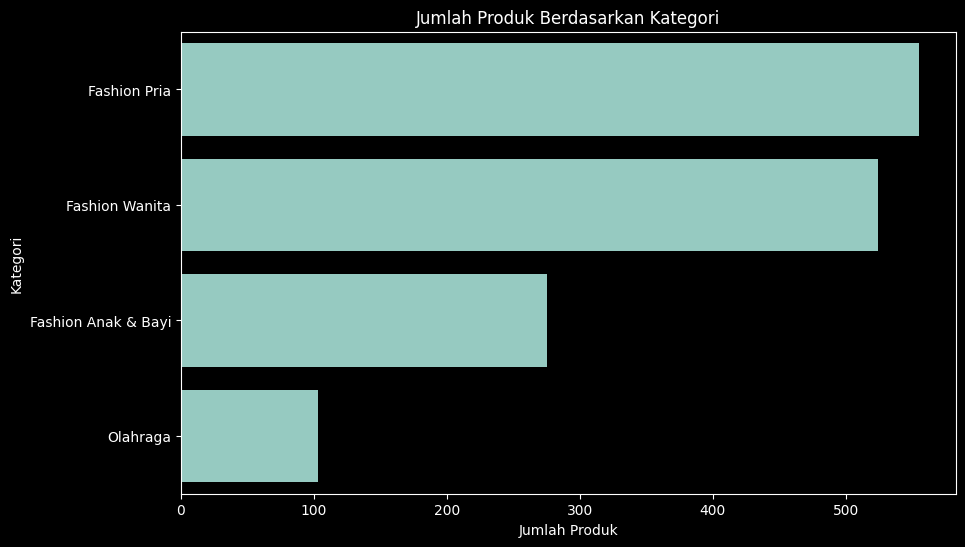

In [10]:
# Membuat visualisasi data
plt.figure(figsize=(10, 6))
sns.countplot(y='categoryName', data=data, order=data['categoryName'].value_counts().index)
plt.title('Jumlah Produk Berdasarkan Kategori')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori')
plt.show()

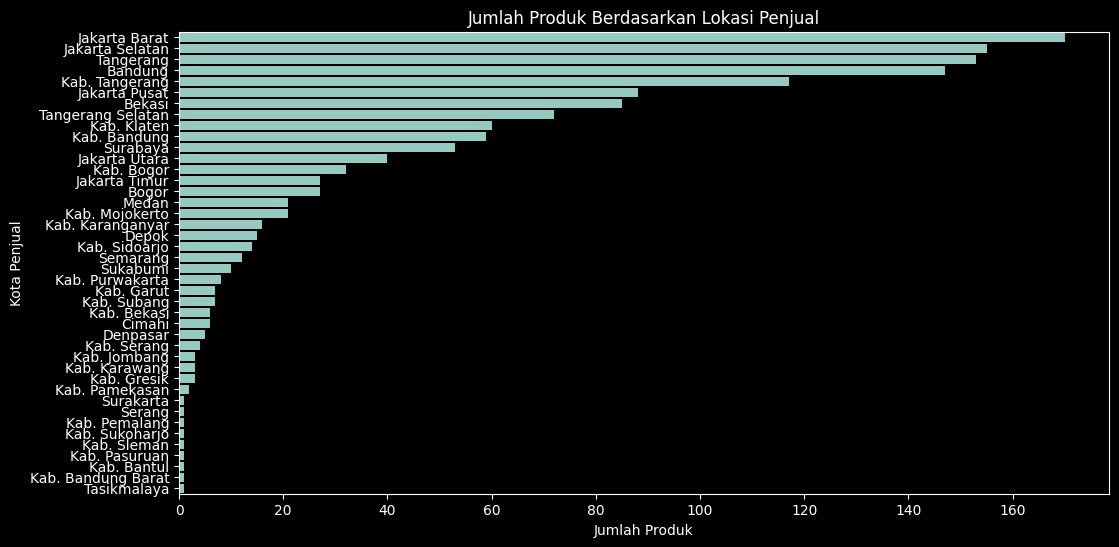

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kelompokkan data berdasarkan kota penjual dan hitung jumlah produk untuk setiap kota
produk_per_kota = data.groupby('shop.city').size().reset_index(name='Jumlah Produk')

# Membuat visualisasi jumlah produk berdasarkan kota penjual
plt.figure(figsize=(12, 6))
sns.barplot(x='Jumlah Produk', y='shop.city', data=produk_per_kota.sort_values(by='Jumlah Produk', ascending=False))
plt.title('Jumlah Produk Berdasarkan Lokasi Penjual')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kota Penjual')
plt.show()


/tmp/ipykernel_12701/3860853505.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  produk_per_rating = data.groupby(pd.cut(data['ratingAverage'], bins=range(0, 6))).size().reset_index(name='Jumlah Produk')


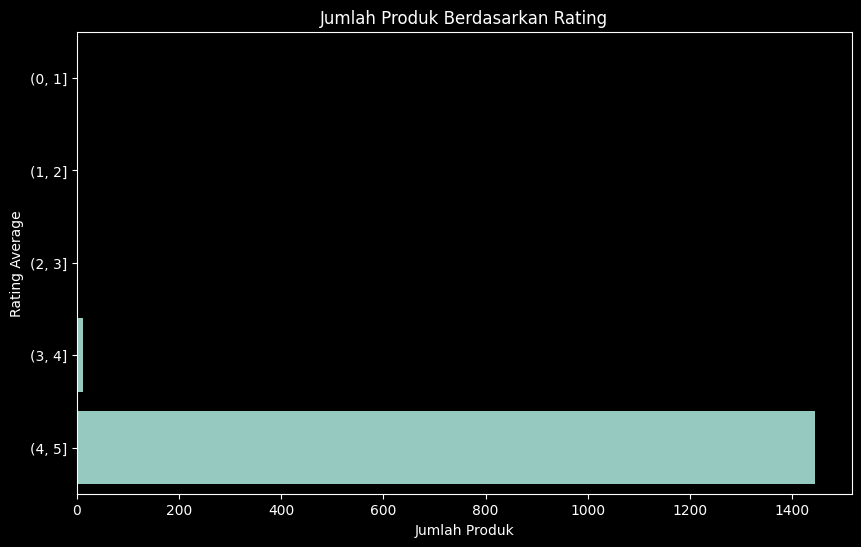

In [12]:
# Kelompokkan data berdasarkan rating dan hitung jumlah produk untuk setiap rentang rating
produk_per_rating = data.groupby(pd.cut(data['ratingAverage'], bins=range(0, 6))).size().reset_index(name='Jumlah Produk')

# Membuat visualisasi jumlah produk berdasarkan rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Jumlah Produk', y='ratingAverage', data=produk_per_rating)
plt.title('Jumlah Produk Berdasarkan Rating')
plt.xlabel('Jumlah Produk')
plt.ylabel('Rating Average')
plt.show()


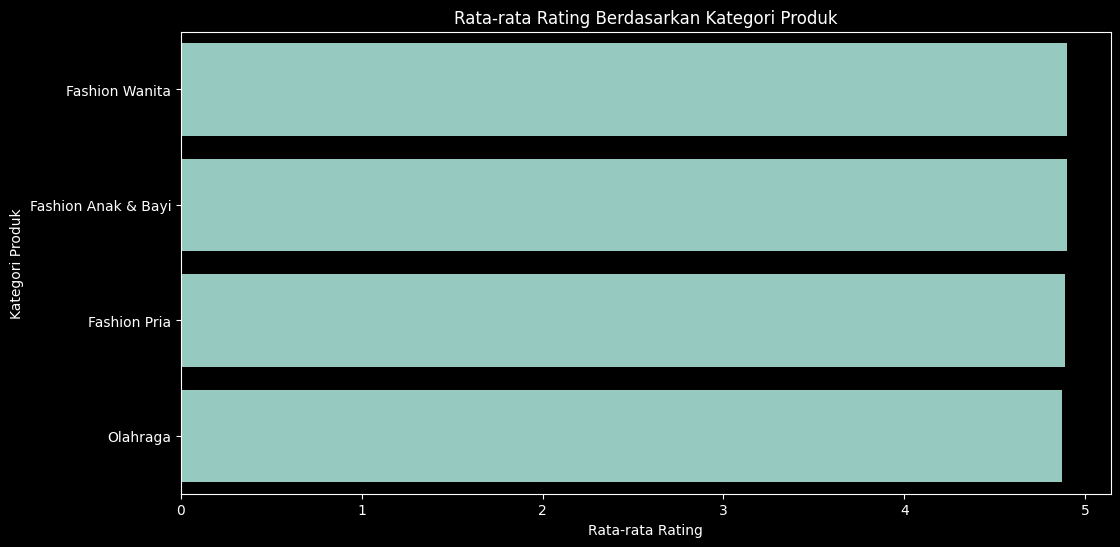

In [13]:
# Kelompokkan data berdasarkan kategori produk dan hitung rata-rata rating untuk setiap kategori
rating_per_kategori = data.groupby('categoryName')['ratingAverage'].mean().reset_index(name='Rata-rata Rating')

# Membuat visualisasi rata-rata rating berdasarkan kategori produk
plt.figure(figsize=(12, 6))
sns.barplot(x='Rata-rata Rating', y='categoryName', data=rating_per_kategori.sort_values(by='Rata-rata Rating', ascending=False))
plt.title('Rata-rata Rating Berdasarkan Kategori Produk')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Kategori Produk')
plt.show()

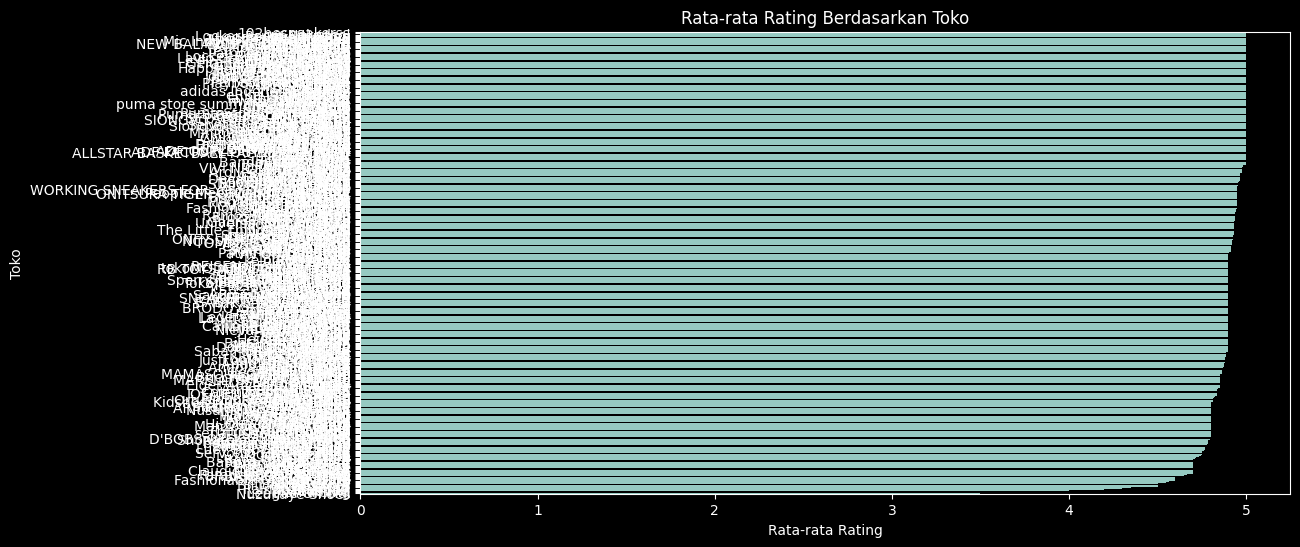

In [15]:
# Kelompokkan data berdasarkan toko dan hitung rata-rata rating untuk setiap toko
rating_per_toko = data.groupby('shop.name')['ratingAverage'].mean().reset_index(name='Rata-rata Rating')

# Membuat visualisasi rata-rata rating berdasarkan toko
plt.figure(figsize=(12, 6))
sns.barplot(x='Rata-rata Rating', y='shop.name', data=rating_per_toko.sort_values(by='Rata-rata Rating', ascending=False))
plt.title('Rata-rata Rating Berdasarkan Toko')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Toko')
plt.show()

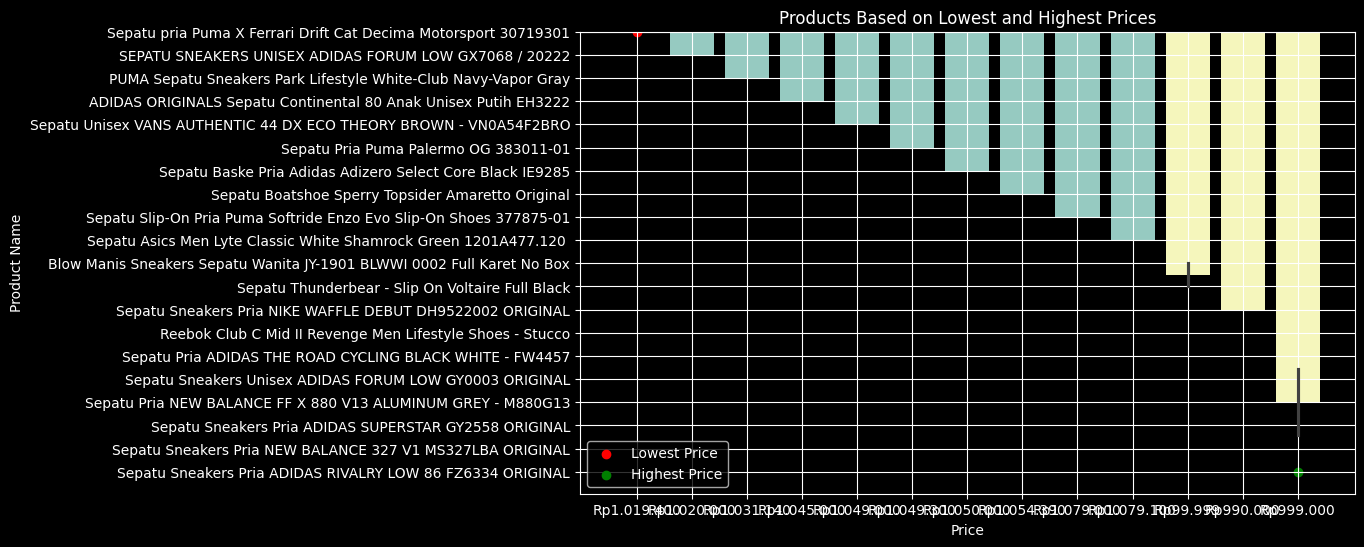

In [17]:
# Sorting the data by price
sorted_data = data.sort_values(by='price')

# Selecting the product with the lowest price
lowest_price_product = sorted_data.iloc[0]

# Selecting the product with the highest price
highest_price_product = sorted_data.iloc[-1]

# Creating a bar plot to display products based on their prices
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='name', data=sorted_data.head(10))  # Displaying top 10 products with lowest prices
sns.barplot(x='price', y='name', data=sorted_data.tail(10))  # Displaying top 10 products with highest prices

# Adding markers for the lowest and highest priced products
plt.scatter(lowest_price_product['price'], lowest_price_product['name'], color='red', label='Lowest Price')
plt.scatter(highest_price_product['price'], highest_price_product['name'], color='green', label='Highest Price')

# Adding labels and title
plt.title('Products Based on Lowest and Highest Prices')
plt.xlabel('Price')
plt.ylabel('Product Name')
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()

In [18]:
data

,id,name,badges,categoryName,countReview,discountPercentage,imageUrl,labelGroups,originalPrice,price,ratingAverage,url,shop.shopId,shop.name,shop.url,shop.city,shop.isOfficial,shop.isPowerBadge
0,11718663582,Aerostreet 37-44 Brooklyn Putih Putih Abu Muda...,Official Store,Fashion Pria,191,50,https://images.tokopedia.net/img/cache/200-squ...,Diskon 5rb,Rp359.800,Rp179.900,4.8,https://www.tokopedia.com/aerostreet/aerostree...,6673471,Aerostreet,https://www.tokopedia.com/aerostreet,Kab. Klaten,True,True
1,7320840825,Sepatu Compass Velocity,Power Merchant Pro Badge,Fashion Pria,95,53,https://images.tokopedia.net/img/cache/200-squ...,"Cashback 7,9rb",Rp1.699.000,Rp798.000,5.0,https://www.tokopedia.com/tijoepass/sepatu-com...,7098187,Tijoepass,https://www.tokopedia.com/tijoepass,Jakarta Selatan,False,True
4,7033293128,SEPATU SNEAKERS ORTUSEIGHT 100% ORIGINAL HARVA...,Official Store,Fashion Pria,165,15,https://images.tokopedia.net/img/cache/200-squ...,"Cashback 11,1rb",Rp329.000,Rp279.650,4.9,https://www.tokopedia.com/ranksports/sepatu-sn...,4232765,RANK Sports,https://www.tokopedia.com/ranksports,Serang,True,True
5,6869226944,HEIDEN HERITAGE [HRTG] - Comet Blaze 365 - Tru...,Power Merchant Pro Badge,Fashion Pria,141,16,https://images.tokopedia.net/img/cache/200-squ...,Diskon 10rb,Rp439.000,Rp369.000,4.9,https://www.tokopedia.com/heidenheritage/heide...,1544074,Heiden Heritage,https://www.tokopedia.com/heidenheritage,Jakarta Utara,False,True
11,1062295385,Sepatu PDH Pendek 01 TNI | Sepatu PDH TNI AD S...,Power Merchant Pro Badge,Fashion Pria,1081,4,https://images.tokopedia.net/img/cache/200-squ...,"Cashback 2,3rb",Rp120.000,Rp115.000,4.9,https://www.tokopedia.com/industricraftcv/sepa...,7304936,Industri Craft CV,https://www.tokopedia.com/industricraftcv,Jakarta Pusat,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751,12464541908,Sepatu Sandal Anak Laki 6 Bulan 1 2 3 4 5 Tahu...,Power Merchant Pro Badge,Fashion Anak & Bayi,4,30,https://images.tokopedia.net/img/cache/200-squ...,9 terjual,Rp34.900,Rp24.500,4.8,https://www.tokopedia.com/athifababyshop/sepat...,737618,Athifa Baby Shop,https://www.tokopedia.com/athifababyshop,Bekasi,False,True
4752,4406496907,FILA Sepatu Anak Laki-Laki Strome - All Black,Official Store,Fashion Pria,8,50,https://images.tokopedia.net/img/cache/200-squ...,"Cashback 13,2rb",Rp529.900,Rp264.950,5.0,https://www.tokopedia.com/fila/fila-sepatu-ana...,2764937,FILA Official Store,https://www.tokopedia.com/fila,Kab. Bandung,True,True
4755,10032449510,Gabino Sepatu Anak Unisex Slip On Casual Presc...,Official Store,Fashion Anak & Bayi,4,50,https://images.tokopedia.net/img/cache/200-squ...,"Cashback 7,4rb",Rp299.000,Rp149.500,4.8,https://www.tokopedia.com/gabino/gabino-sepatu...,2385268,Gabino Official Store,https://www.tokopedia.com/gabino,Jakarta Barat,True,True
4764,11029301660,Sepatu Anak Perempuan Laki Laki Pro ATT Sekola...,Power Merchant Pro Badge,Fashion Anak & Bayi,26,6,https://images.tokopedia.net/img/cache/200-squ...,"Cashback 1,9rb",Rp105.000,Rp99.000,4.9,https://www.tokopedia.com/kingkong-online/sepa...,892644,KingKongOnline,https://www.tokopedia.com/kingkong-online,Bekasi,False,True
